# MachineLearnia Vidéo 5 - Premier Neurone 


In [63]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


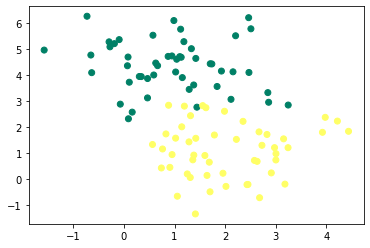

In [64]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

In [65]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [66]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [159]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [126]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [127]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [128]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [156]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm

In [157]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

In [141]:
#W, b = artificial_neuron(X, y)

# 3. Frontiere de décision

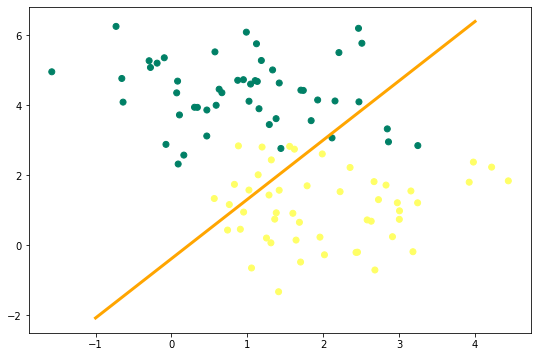

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# Exercice - Cat vs Dog

In [1]:

from utilities import *

In [2]:
X_train, y_train, X_test, y_test = load_data()


In [5]:
X_test[0][0]


array([47, 47, 51, 52, 54, 60, 53, 57, 55, 57, 58, 57, 59, 59, 59, 59, 67,
       61, 64, 63, 63, 65, 59, 30, 11,  9,  9,  5,  3,  2,  0,  2,  0,  6,
       11, 18, 13, 18, 19, 32, 62, 64, 60, 60, 60, 60, 61, 60, 61, 53, 53,
       52, 55, 54, 50, 49, 52, 47, 53, 55, 52, 46, 52, 53], dtype=uint8)

In [135]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [136]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\Users\axgontie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:1223: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



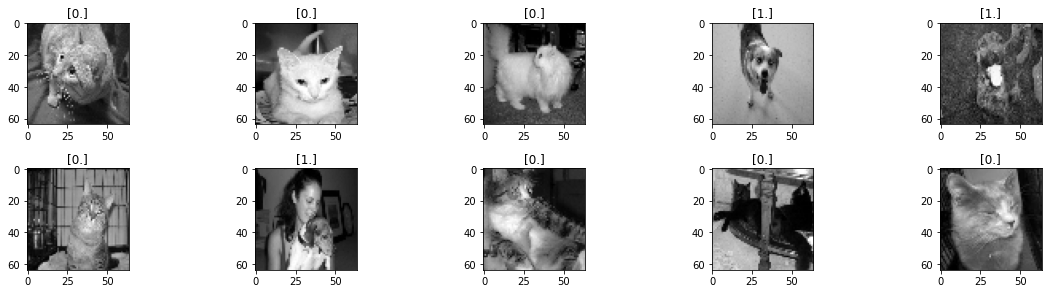

In [137]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [138]:
# TO DO 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !

# 1. Normalisation du dataset


In [144]:
X_train, y_train, X_test, y_test = load_data()

X_train_reshape = X_train.reshape(X_train.shape[0], -1)/X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1)/X_test.max()
X_train_reshape
print(X_test_reshape.shape)
print(X_train_reshape.shape)



(200, 4096)
(1000, 4096)


# 2. Entrainer le modèle


100%|██████████| 10000/10000 [00:44<00:00, 224.34it/s]


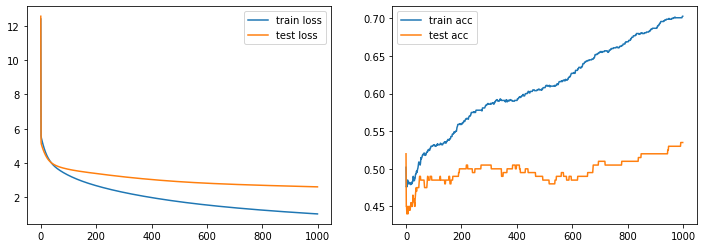

In [160]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter=10000)
